In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Set paths for training, testing, and validation directories
train_dir = 'C:\\python vs\\train\\train'
val_dir = 'C:\\python vs\\val\\val'
test_dir = 'C:\\python vs\\test\\test'

# Define image parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Use ImageDataGenerator to augment the data and rescale the images
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, 
                                   width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the dataset directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 5232 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers, models

# Define a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\python vs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
EPOCHS = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE
)



Epoch 1/20


c:\python vs\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 607ms/step - accuracy: 0.7243 - loss: 0.5885 - val_accuracy: 0.5625 - val_loss: 0.6101
Epoch 2/20
  1/163 ━━━━━━━━━━━━━━━━━━━━ 51s 318ms/step - accuracy: 0.8438 - loss: 0.4184

C:\Users\R.K.BHUBESH\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.4184 - val_accuracy: 0.5625 - val_loss: 0.6239
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 547ms/step - accuracy: 0.7923 - loss: 0.4258 - val_accuracy: 0.8125 - val_loss: 0.6121
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.9062 - loss: 0.3621 - val_accuracy: 0.8125 - val_loss: 0.5908
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 546ms/step - accuracy: 0.8598 - loss: 0.3215 - val_accuracy: 0.7500 - val_loss: 0.5119
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.2287 - val_accuracy: 0.8125 - val_loss: 0.4793
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 559ms/step - accuracy: 0.8792 - loss: 0.2598 - val_accuracy: 0.8750 - val_loss: 0.3451
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.9062 - loss: 0.2388 - val_accuracy: 0.8750 - val_loss: 0.3768
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 544ms/step - accuracy: 0.8934 - loss: 0.2342 - val_accurac

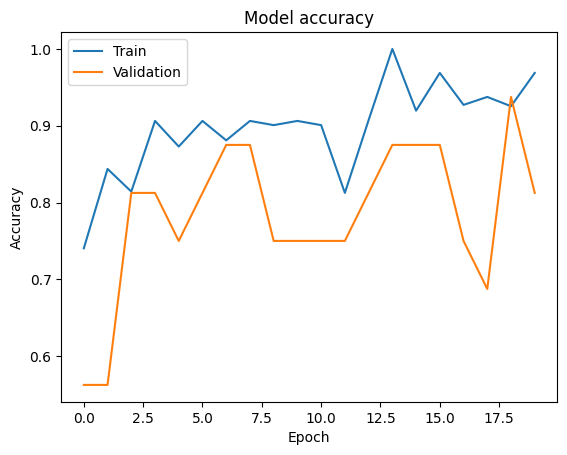

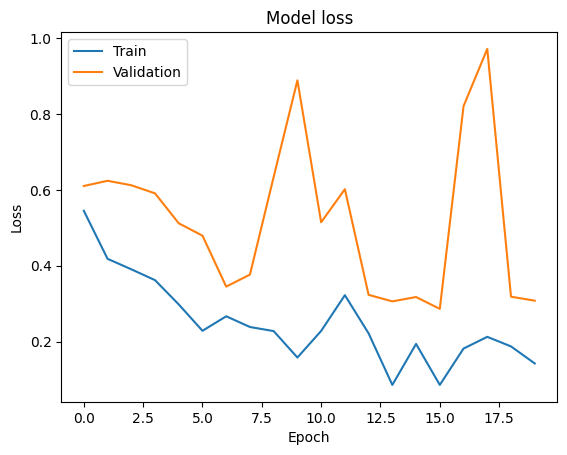

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


c:\python vs\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 396ms/step
True labels: 624, Predicted labels: 624
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.83      0.87       234
   PNEUMONIA       0.90      0.95      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.90       624



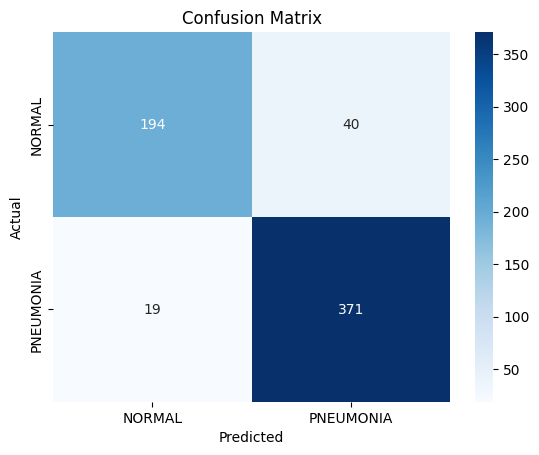

In [6]:
# Reset the test generator to avoid mismatches
test_generator.reset()

# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator))  # Use len(test_generator) to predict over all batches

# Convert predictions to binary output (0 or 1)
predicted_classes = np.where(predictions > 0.5, 1, 0)

# Get the true labels from the test generator
true_classes = test_generator.classes

# Ensure the predicted classes and true classes have the same length
print(f"True labels: {len(true_classes)}, Predicted labels: {len(predicted_classes)}")

# Check if lengths match; if not, debug here before proceeding to evaluation

# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [7]:
model.save('pneumonia_detection_model_1.h5')

In [10]:
model.save('pneumonia_detection_model_1.h5')

In [2]:
from tensorflow.keras.models import load_model
model = load_model('pneumonia_detection_model_1.h5')

In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Load your pre-trained model
model = tf.keras.models.load_model('pneumonia_detection_model_1.h5')

# Unfreeze some of the last layers for fine-tuning
for layer in model.layers:
    layer.trainable = False

# Unfreeze the last few layers (e.g., last 4 layers)
for layer in model.layers[-4:]:
    layer.trainable = True

# Print summary to confirm which layers are trainable
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,123 (13.17 MB)

 Trainable params: 3,212,289 (12.25 MB)

 Non-trainable params: 240,832 (940.75 KB)

 Optimizer params: 2 (12.00 B)

In [9]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Set a lower learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [10]:
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Assuming you have 'train' and 'validation' folders with respective classes
training_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5232 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [11]:
# Fine-tune the model
history = model.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // 32,
    epochs=10,  # Adjust based on needs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)


Epoch 1/10


c:\python vs\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 536ms/step - accuracy: 0.9367 - loss: 0.1706 - val_accuracy: 0.7500 - val_loss: 0.3384
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.3237 - val_accuracy: 0.7500 - val_loss: 0.3386
Epoch 3/10


C:\Users\R.K.BHUBESH\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.9247 - loss: 0.1849 - val_accuracy: 0.7500 - val_loss: 0.3554
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.1116 - val_accuracy: 0.7500 - val_loss: 0.3553
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 375ms/step - accuracy: 0.9357 - loss: 0.1529 - val_accuracy: 0.7500 - val_loss: 0.3611
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0630 - val_accuracy: 0.7500 - val_loss: 0.3611
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 388ms/step - accuracy: 0.9418 - loss: 0.1496 - val_accuracy: 0.7500 - val_loss: 0.3637
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7812 - loss: 0.4201 - val_accuracy: 0.7500 - val_loss: 0.3640
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.9345 - loss: 0.1691 - val_accuracy: 0.7500 - val_loss: 0.3631
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.1247 - val_accuracy: 

In [12]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.7500 - loss: 0.3632
Test Accuracy: 0.75
Test Loss: 0.36


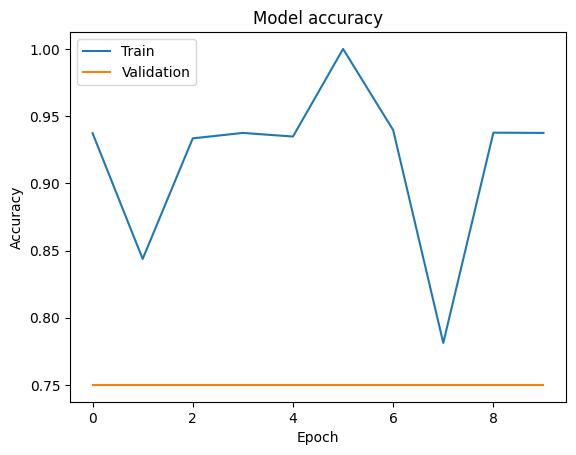

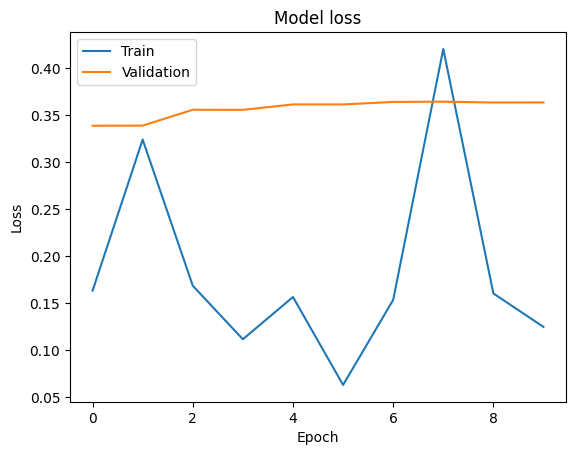

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step
True labels: 624, Predicted labels: 624
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.95      0.73      0.82       234
   PNEUMONIA       0.86      0.98      0.91       390

    accuracy                           0.88       624
   macro avg       0.90      0.85      0.87       624
weighted avg       0.89      0.88      0.88       624



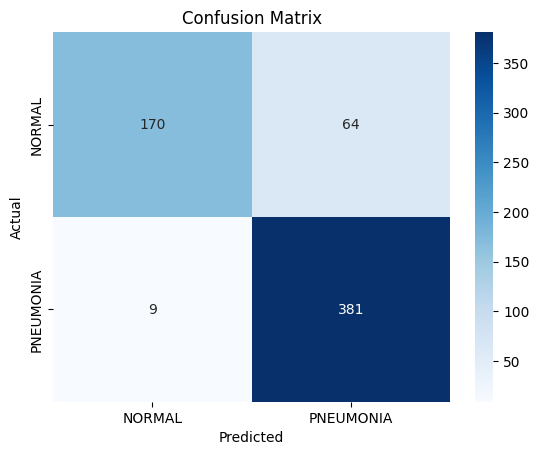

In [14]:
# Reset the test generator to avoid mismatches
test_generator.reset()

# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator))  # Use len(test_generator) to predict over all batches

# Convert predictions to binary output (0 or 1)
predicted_classes = np.where(predictions > 0.5, 1, 0)

# Get the true labels from the test generator
true_classes = test_generator.classes

# Ensure the predicted classes and true classes have the same length
print(f"True labels: {len(true_classes)}, Predicted labels: {len(predicted_classes)}")

# Check if lengths match; if not, debug here before proceeding to evaluation

# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [15]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(training_generator.classes),
    y=training_generator.classes
)

# Convert to dictionary format as required by model.fit()
class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    class_weight=class_weights_dict  # Apply class weights
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 387ms/step - accuracy: 0.9383 - loss: 0.1960 - val_accuracy: 0.8125 - val_loss: 0.3058
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9375 - loss: 0.1176 - val_accuracy: 0.8125 - val_loss: 0.3056
Epoch 3/10


C:\Users\R.K.BHUBESH\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 377ms/step - accuracy: 0.9277 - loss: 0.1816 - val_accuracy: 0.8750 - val_loss: 0.2891
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9375 - loss: 0.1410 - val_accuracy: 0.8750 - val_loss: 0.2891
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 369ms/step - accuracy: 0.9216 - loss: 0.1772 - val_accuracy: 0.8750 - val_loss: 0.2833
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.1537 - val_accuracy: 0.8750 - val_loss: 0.2833
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 364ms/step - accuracy: 0.9282 - loss: 0.1684 - val_accuracy: 0.8750 - val_loss: 0.2820
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.1870 - val_accuracy: 0.8750 - val_loss: 0.2819
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 369ms/step - accuracy: 0.9218 - loss: 0.1743 - val_accuracy: 0.8750 - val_loss: 0.2812
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.2691 - val_accuracy

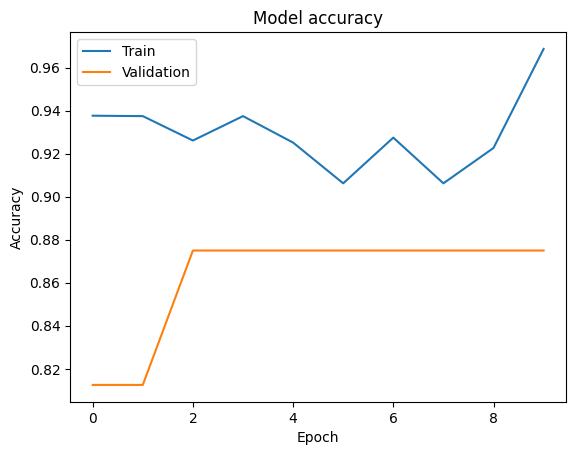

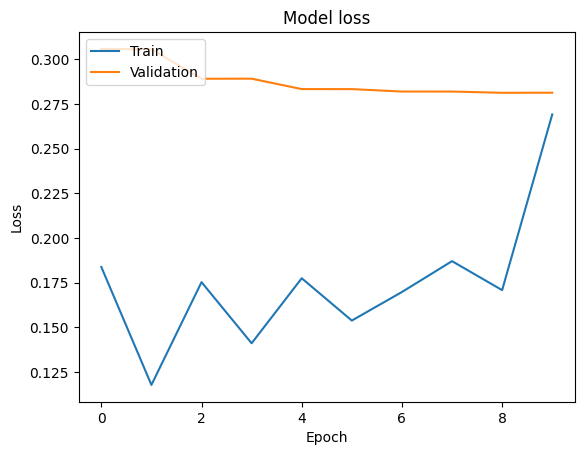

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step
True labels: 624, Predicted labels: 624
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.89      0.88      0.88       234
   PNEUMONIA       0.93      0.93      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.91      0.91      0.91       624



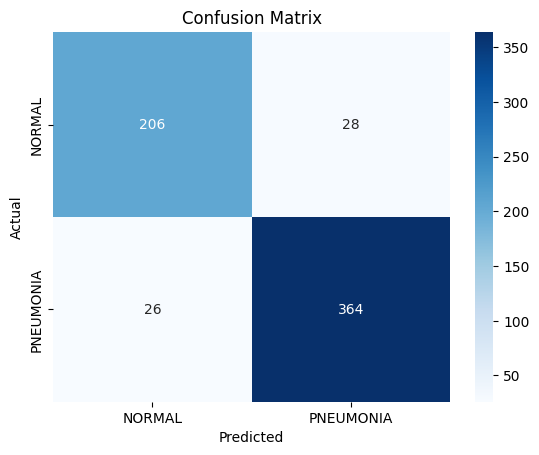

In [17]:
# Reset the test generator to avoid mismatches
test_generator.reset()

# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator))  # Use len(test_generator) to predict over all batches

# Convert predictions to binary output (0 or 1)
predicted_classes = np.where(predictions > 0.5, 1, 0)

# Get the true labels from the test generator
true_classes = test_generator.classes

# Ensure the predicted classes and true classes have the same length
print(f"True labels: {len(true_classes)}, Predicted labels: {len(predicted_classes)}")

# Check if lengths match; if not, debug here before proceeding to evaluation

# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [18]:
model.save('pneumonia_detection_model_2.h5')

In [11]:
# Print model summary to find layer names
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,359,365 (39.52 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,906,244 (26.35 MB)